In [350]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import csv
from pathlib import Path
import numpy as np
import time
%matplotlib inline

In [351]:
#Import tha relevant alpha vantage libraries
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.cryptocurrencies import CryptoCurrencies

In [352]:
#Import tha required libraries for datapreparation and analysis
import sklearn
import numpy as np
import seaborn as sns

In [353]:
#Import Required modules for Linear Regression
from sklearn.model_selection import train_test_split

# Import Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Import different Models -  1. linera_model - LogisticRegression
#Import different Models -  5. svm - LinearSVC

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 
#from sklearn.preprocessing import GetDummies
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [354]:
#set key
key = '32UEEELX55R5WBXX'
start_date = '2015-04-01' 

## Alpha_vantage for downloading stock data

In [355]:
#Alpha_Vantage API for stocks
#Instantiate API connection
ts = TimeSeries (key, output_format='pandas')

In [356]:
"""Return monthly time series in two json objects as data and meta_data. It raises ValueError when problems arise
Keyword Arguments: 
symbol:  the symbol for the equity we want to get its data"""
def get_monthly_adjusted(self, symbol):
    _FUNCTION_KEY = "TIME_SERIES_MONTHLY_ADJUSTED"
    return _FUNCTION_KEY, 'Time Series (Monthly)', 'Meta Data'

In [357]:
csv_path = Path("/Users/unicorn/Desktop/FinTech_Workspace/Roboadvisor/Resources/stock_tickers.csv")
#Tickers_df = pd.read_csv(csv_path)
#Tickers = Tickers_df.values.tolist()
#print (Tickers)
Tickers = []
with open(csv_path, newline='') as inputfile:
    for row in csv.reader(inputfile):
        Tickers.append(row[0])

print(Tickers)

['AAPL', 'GOOGL', 'GOOG', 'MSFT', 'AMZN', 'FB', 'JPM', 'JNJ', 'XOM', 'BAC', 'WMT', 'WFC', 'V', 'BRK.B', 'T', 'HD', 'CVX', 'UNH', 'INTC', 'PFE', 'VZ', 'PG', 'BA', 'ORCL', 'CSCO', 'C', 'KO', 'MA', 'CMCSA', 'ABBV', 'DWDP', 'PEP', 'DIS', 'PM', 'MRK', 'IBM', 'MMM', 'NVDA', 'GE', 'MCD', 'AMGN', 'MO', 'NFLX', 'HON', 'MDT', 'GILD', 'NKE', 'UTX', 'BMY', 'ABT']


In [359]:
stk_df = {}
df = pd.DataFrame(columns=Tickers)
count = 0
for ticker in Tickers:
    data2, meta = ts.get_monthly_adjusted(ticker)
    stk_df.update({ticker+str("-close"):(data2.iloc[:,4])})
    time.sleep(12)

ValueError: Thank you for using Alpha Vantage! Our standard API call frequency is 5 calls per minute and 500 calls per day. Please visit https://www.alphavantage.co/premium/ if you would like to target a higher API call frequency.

In [ ]:
stk_df

In [329]:
#Need to convert this into Month and Year so the feature can be consolidated with inflation data that is provided at the end of the month
stocks_df = pd.DataFrame(stk_df)
stocks_df.index = pd.to_datetime(stocks_df.index, infer_datetime_format = True)
stocks_df = stocks_df[stocks_df.index > start_date]
print(stocks_df)   


#output = pd.DataFrame()
#df_dictionary = pd.DataFrame([dictionary])
#output = pd.concat([output, df_dictionary], ignore_index=True)
#print(output.head())
 


            AAPL-close  CRM-close  GOOGL-close
date                                          
2015-04-30     28.3992      72.82       548.77
2015-05-29     29.6860      72.75       545.32
2015-06-30     28.5798      69.63       540.04
2015-07-31     27.6398      73.30       657.50
2015-08-31     25.8099      69.36       647.82
...                ...        ...          ...
2021-12-31    177.3437     254.13      2897.04
2022-01-31    174.5572     232.63      2706.07
2022-02-28    165.1200     210.53      2701.14
2022-03-31    174.6100     212.32      2781.35
2022-04-18    165.0700     187.01      2553.53

[85 rows x 3 columns]


In [330]:
stocks_df.reset_index(inplace=True)
df2 = pd.melt(stocks_df, id_vars=['date'], 
                  var_name="%-close")
df2

,date,%-close,value
0,2015-04-30,AAPL-close,28.3992
1,2015-05-29,AAPL-close,29.6860
2,2015-06-30,AAPL-close,28.5798
3,2015-07-31,AAPL-close,27.6398
4,2015-08-31,AAPL-close,25.8099
...,...,...,...
250,2021-12-31,GOOGL-close,2897.0400
251,2022-01-31,GOOGL-close,2706.0700
252,2022-02-28,GOOGL-close,2701.1400
253,2022-03-31,GOOGL-close,2781.3500


In [312]:
df2 = df2.set_index('date')
df2

,%-close,value
date,,
2015-04-30,AAPL-close,28.3992
2015-05-29,AAPL-close,29.6860
2015-06-30,AAPL-close,28.5798
2015-07-31,AAPL-close,27.6398
2015-08-31,AAPL-close,25.8099
...,...,...
2021-12-31,CRM-close,254.1300
2022-01-31,CRM-close,232.6300
2022-02-28,CRM-close,210.5300


In [325]:
df2 = df2.merge(sp_stocks_df, left_index=True, right_index=True)
df2

,%-close,value,SPY
date,,,
2015-04-30,AAPL-close,28.3992,183.1123
2015-04-30,CRM-close,72.8200,183.1123
2015-05-29,AAPL-close,29.6860,185.4664
2015-05-29,CRM-close,72.7500,185.4664
2015-06-30,AAPL-close,28.5798,181.7385
...,...,...,...
2022-02-28,CRM-close,210.5300,435.2923
2022-03-31,AAPL-close,174.6100,451.6400
2022-03-31,CRM-close,212.3200,451.6400


## Alpha_vantage for downloading S&P 500 stock data

In [321]:
SPTicker = ['SPY']

In [322]:
sp_stk_df = {}
sp_df = pd.DataFrame(columns=SPTicker)
for spticker in SPTicker:
    spdata, meta = ts.get_monthly_adjusted(spticker)
    sp_stk_df.update({spticker:(spdata.iloc[:,4])})

In [323]:
#Need to convert this into Month and Year so the feature can be consolidated with inflation data that is provided at the end of the month
sp_stocks_df = pd.DataFrame(sp_stk_df)
sp_stocks_df.index = pd.to_datetime(sp_stocks_df.index, infer_datetime_format = True)
sp_stocks_df = sp_stocks_df[sp_stocks_df.index > start_date]
print(sp_stocks_df)


                 SPY
date                
2022-04-14  437.7900
2022-03-31  451.6400
2022-02-28  435.2923
2022-01-31  448.5317
2021-12-31  473.5049
...              ...
2015-08-31  174.3680
2015-07-31  185.7636
2015-06-30  181.7385
2015-05-29  185.4664
2015-04-30  183.1123

[85 rows x 1 columns]


In [324]:
# As we wouldnot want to use the current month S&P returns to predict the current month stock prices, using the previosu month figures
sp_stocks_df_prev = sp_stocks_df.copy()
sp_stocks_df_prev = sp_stocks_df_prev.shift(1)
sp_stocks_df_prev

,SPY
date,
2022-04-14,NaN
2022-03-31,437.7900
2022-02-28,451.6400
2022-01-31,435.2923
2021-12-31,448.5317
...,...
2015-08-31,170.0105
2015-07-31,174.3680
2015-06-30,185.7636


## Alpha_vantage for downloading Treasury Yields

In [120]:
#Getting Treasury Yield for 5 year treasury stock
#Need to convert this into Month and Year so the feature can be consolidated with stock data that is provided at the end of the month
url = f'https://www.alphavantage.co/query?function=TREASURY_YIELD&interval=monthly&maturity=5year&apikey={key}'
r = requests.get(url)
data = r.json()
TYield = pd.DataFrame(data['data'])
TYield.index = TYield['date']
TYield = TYield.drop(TYield.columns[[0]], axis=1)
TYield.index = pd.to_datetime(TYield.index, infer_datetime_format = True)
TYield = TYield[TYield.index > start_date]
TYield

,value
date,
2022-03-01,2.11
2022-02-01,1.81
2022-01-01,1.54
2021-12-01,1.23
2021-11-01,1.20
...,...
2015-09-01,1.49
2015-08-01,1.54
2015-07-01,1.63


## Alpha_vantage for Inflation Expectation

In [122]:
#Getting Inflation Expectation 
#Taking Inflation expectation and not inflation data because only the expectation is available on a monthly basis, while the inflation data available is annual
#need to be converted to month and time
url = f'https://www.alphavantage.co/query?function=INFLATION_EXPECTATION&apikey={key}'
r = requests.get(url)
data = r.json()
InflationExp = pd.DataFrame(data['data'])
InflationExp.index = InflationExp['date']
InflationExp = InflationExp.drop(InflationExp.columns[[0]], axis=1)
InflationExp.index  = pd.to_datetime(InflationExp.index, infer_datetime_format = True)
InflationExp = InflationExp[InflationExp.index > start_date]
InflationExp


,value
date,
2022-02-01,4.9
2022-01-01,4.9
2021-12-01,4.8
2021-11-01,4.9
2021-10-01,4.8
...,...
2015-09-01,2.8
2015-08-01,2.8
2015-07-01,2.8


## Alpha_vantage for Consumer Sentiment

In [123]:
#Getting Consumer Sentiment
url = f'https://www.alphavantage.co/query?function=CONSUMER_SENTIMENT&apikey={key}'
r = requests.get(url)
data = r.json()
Sentiment = pd.DataFrame(data['data'])
Sentiment.index = Sentiment['date']
Sentiment = Sentiment.drop(Sentiment.columns[[0]], axis=1)
Sentiment.index = pd.to_datetime(Sentiment.index, infer_datetime_format = True)
Sentiment = Sentiment[Sentiment.index > start_date]
Sentiment

,value
date,
2022-02-01,62.8
2022-01-01,67.2
2021-12-01,70.6
2021-11-01,67.4
2021-10-01,71.7
...,...
2015-09-01,87.2
2015-08-01,91.9
2015-07-01,93.1


## Alpha_vantage for EPS Download

In [334]:
##How to use it as this is available only on a quarterly basis
#df = pd.DataFrame(columns=Tickers)
eps_df = {}
reps = pd.DataFrame()
for ticker in Tickers:
    url = f'https://www.alphavantage.co/query?function=EARNINGS&symbol=IBM&apikey={key}'
    r = requests.get(url)
    data = r.json()
    Ticker1 = pd.DataFrame(data['quarterlyEarnings'])
    Ticker1.index = Ticker1['fiscalDateEnding']
    Ticker1 = Ticker1.drop(Ticker1.columns[[0,1,3,4,5]], axis=1)
    Ticker1.rename(columns={"reportedEPS":ticker},inplace=True)
    eps_df.update(Ticker1)
REPS_df = pd.DataFrame(eps_df)
REPS_df.index = pd.to_datetime(REPS_df.index, infer_datetime_format = True)
REPS_df = REPS_df[REPS_df.index > start_date]
REPS_df["Date"] = pd.to_datetime(REPS_df.index, format="%Y-%m")
REPS_df = REPS_df.set_index("Date").resample("m").ffill()
REPS_df 

,AAPL,CRM,GOOGL
Date,,,
2015-06-30,3.84,3.84,3.84
2015-07-31,3.84,3.84,3.84
2015-08-31,3.84,3.84,3.84
2015-09-30,3.34,3.34,3.34
2015-10-31,3.34,3.34,3.34
...,...,...,...
2021-08-31,2.33,2.33,2.33
2021-09-30,2.52,2.52,2.52
2021-10-31,2.52,2.52,2.52


## Alpha_vantage for Interest Rate

In [128]:
## Federal Interest Rate (Monthly)

url = 'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&interval=monthly&apikey=demo'
r = requests.get(url)
data = r.json()
Interest_Rate = pd.DataFrame(data['data'])
Interest_Rate.index = Interest_Rate['date']
Interest_Rate = Interest_Rate.drop(Interest_Rate.columns[[0]], axis=1)
Interest_Rate.index = pd.to_datetime(Interest_Rate.index, infer_datetime_format = True)
Interest_Rate = Interest_Rate[Interest_Rate.index > start_date]
Interest_Rate

,value
date,
2022-03-01,0.20
2022-02-01,0.08
2022-01-01,0.08
2021-12-01,0.08
2021-11-01,0.08
...,...
2015-09-01,0.14
2015-08-01,0.14
2015-07-01,0.13


## Alpha_vantage for Unemployment Rates

In [126]:
#Getting Unemployment Rates
url = f'https://www.alphavantage.co/query?function=UNEMPLOYMENT&apikey=demo{key}'
r = requests.get(url)
data = r.json()
Unemployment = pd.DataFrame(data['data'])
Unemployment.index = Unemployment['date']
Unemployment = Unemployment.drop(Unemployment.columns[[0]], axis=1)
Unemployment.index = pd.to_datetime(Unemployment.index, infer_datetime_format = True)
Unemployment = Unemployment[Unemployment.index > start_date]
Unemployment

,value
date,
2022-03-01,3.6
2022-02-01,3.8
2022-01-01,4.0
2021-12-01,3.9
2021-11-01,4.2
...,...
2015-09-01,5.0
2015-08-01,5.1
2015-07-01,5.2


# Dataset_Preliminary

## Modify the feature dataframes to have a consistent date format and comsolidate them into one file
- Treasury Yields: TYield : treasury_yield 
- Inflation Expectation: InflationExp: inflation_expect
- S&P 500 Correlation: sp_stocks_df : sp_500
- Unemployment Rate: Unemployment : unemployment_rate
- Consumer Sentiments: Sentiment : consumer_sentiment

In [130]:
#Convert the Treasury yields into Month and Year format for conatenating with other dataframes
treasury_yield = TYield.copy()
treasury_yield = treasury_yield.sort_values(by=['date'], ascending=True)
treasury_yield['value'] = treasury_yield['value'].astype(float)
treasury_yield['value'] = treasury_yield.pct_change(periods=1)
treasury_yield = treasury_yield.reset_index()
treasury_yield['date'] = treasury_yield['date'].dt.to_period('M')
treasury_yield.set_index('date', inplace = True)
treasury_yield.rename(columns={"value": "treausry_yield"}, inplace = True)
treasury_yield

,treausry_yield
date,
2015-05,NaN
2015-06,0.090909
2015-07,-0.029762
2015-08,-0.055215
2015-09,-0.032468
...,...
2021-11,0.081081
2021-12,0.025000
2022-01,0.252033


In [131]:
#Convert the inflation expectation into Month and Year format for conatenating with other dataframes
inflation_expect = InflationExp.copy()
inflation_expect = inflation_expect.sort_values(by=['date'], ascending=True)
inflation_expect['value'] = inflation_expect['value'].astype(float)
inflation_expect['value'] = inflation_expect.pct_change(periods=1)
inflation_expect = inflation_expect.reset_index()
inflation_expect['date'] = inflation_expect['date'].dt.to_period('M')
inflation_expect.set_index('date', inplace = True)
inflation_expect.rename(columns={"value": "inflation_expectation"}, inplace = True)
inflation_expect

,inflation_expectation
date,
2015-05,NaN
2015-06,-0.035714
2015-07,0.037037
2015-08,0.000000
2015-09,0.000000
...,...
2021-10,0.043478
2021-11,0.020833
2021-12,-0.020408


In [263]:
#Convert the S&P 500 into Month and Year format for conatenating with other dataframes

sp_500 = sp_stocks_df_prev.copy()
sp_500 = sp_500.sort_values(by=['date'], ascending=True)
sp_500['SPY'] = sp_500.pct_change(periods=1)
sp_500 = sp_500.reset_index()
sp_500['date'] = sp_500['date'].dt.to_period('M')
sp_500.set_index('date', inplace = True)
sp_500.rename(columns={"SPY": "sp500_return"}, inplace = True)
sp_500

,sp500_return
date,
2015-04,NaN
2015-05,-0.020100
2015-06,0.022148
2015-07,-0.061345
2015-08,-0.024990
...,...
2021-12,-0.052741
2022-01,-0.029517
2022-02,0.037556


In [133]:
#Convert the Unemployment rate into Month and Year format for concatenating with other dataframes
unemployment_rate = Unemployment.copy()
unemployment_rate = unemployment_rate.sort_values(by=['date'], ascending=True)
unemployment_rate['value'] = unemployment_rate['value'].astype(float)
unemployment_rate['value'] = unemployment_rate.pct_change(periods=1)
unemployment_rate = unemployment_rate.reset_index()
unemployment_rate['date'] = unemployment_rate['date'].dt.to_period('M')
unemployment_rate.set_index('date', inplace = True)
unemployment_rate.rename(columns={"value": "unemployment_rate"}, inplace = True)
unemployment_rate

,unemployment_rate
date,
2015-05,NaN
2015-06,-0.053571
2015-07,-0.018868
2015-08,-0.019231
2015-09,-0.019608
...,...
2021-11,-0.086957
2021-12,-0.071429
2022-01,0.025641


In [134]:
#Convert the Consumer Sentiment into Month and Year format for concatenating with other dataframes
consumer_sentiment = Sentiment.copy()
consumer_sentiment.replace('.', np.NaN, inplace=True)
consumer_sentiment = consumer_sentiment.sort_values(by=['date'], ascending=True)
consumer_sentiment = consumer_sentiment.dropna()
consumer_sentiment['value'] = consumer_sentiment['value'].astype(float)
consumer_sentiment['value'] = consumer_sentiment.pct_change(periods=1)
consumer_sentiment = consumer_sentiment.reset_index()
consumer_sentiment['date'] = consumer_sentiment['date'].dt.to_period('M')
consumer_sentiment.set_index('date', inplace = True)
consumer_sentiment.rename(columns={"value": "consumer_sentiment"}, inplace = True)
consumer_sentiment

,consumer_sentiment
date,
2015-05,NaN
2015-06,0.059537
2015-07,-0.031217
2015-08,-0.012889
2015-09,-0.051143
...,...
2021-10,-0.015110
2021-11,-0.059972
2021-12,0.047478


In [135]:
macro_features = pd.concat([treasury_yield, inflation_expect, sp_500, unemployment_rate, consumer_sentiment], axis=1, join='inner')

In [136]:
macro_features.dropna(inplace=True)
macro_features

,treausry_yield,inflation_expectation,sp500_return,unemployment_rate,consumer_sentiment
date,,,,,
2015-06,0.090909,-0.035714,-0.020100,-0.053571,0.059537
2015-07,-0.029762,0.037037,0.022148,-0.018868,-0.031217
2015-08,-0.055215,0.000000,-0.061345,-0.019231,-0.012889
2015-09,-0.032468,0.000000,-0.024990,-0.019608,-0.051143
2015-10,-0.067114,-0.035714,0.085286,0.000000,0.032110
...,...,...,...,...,...
2021-10,0.290698,0.043478,0.070164,-0.021277,-0.015110
2021-11,0.081081,0.020833,-0.008035,-0.086957,-0.059972
2021-12,0.025000,-0.020408,0.046288,-0.071429,0.047478


In [268]:
#Need to convert this into Month and Year so the feature can be consolidated with inflation data that is provided at the end of the month
stocks_df  
stocks_dataframe = stocks_df.copy()  
stocks_dataframe.dropna(inplace=True)
stocks_dataframe = stocks_dataframe.reset_index()
stocks_dataframe['date'] = stocks_dataframe['date'].dt.to_period('M')
stocks_dataframe.set_index('date', inplace = True)
stocks_dataframe.drop('CRM-close', axis=1, inplace=True)
#stocks_dataframe.drop(stocks_dataframe['CRM-close'], inplace=True)
# Setup our target.  This identifies if the price went up or down
stocks_dataframe["AAPL-Target"] = stocks_dataframe["AAPL-close"].rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])
stocks_dataframe_prev = stocks_dataframe.copy()
stocks_dataframe_prev = stocks_dataframe_prev.shift(1)
stocks_dataframe_prev

,AAPL-close,AAPL-Target
date,,
2015-04,NaN,NaN
2015-05,28.3992,NaN
2015-06,29.6860,1.0
2015-07,28.5798,0.0
2015-08,27.6398,0.0
...,...,...
2021-12,165.0893,1.0
2022-01,177.3437,1.0
2022-02,174.5572,0.0


In [274]:
#Need to convert this into Month and Year so the feature can be consolidated with inflation data that is provided at the end of the month
REPS_df  
EPS_dataframe = REPS_df.copy()  
EPS_dataframe.dropna(inplace=True)
EPS_dataframe.replace('.', np.NaN, inplace=True)
EPS_dataframe = EPS_dataframe.sort_values(by=['fiscalDateEnding'], ascending=True)
EPS_dataframe = EPS_dataframe.dropna()
for ticker in Tickers:
    EPS_dataframe[ticker] = EPS_dataframe[ticker].astype(float)
EPS_dataframe = EPS_dataframe.pct_change(periods=1)
EPS_dataframe.dropna(inplace=True)
EPS_dataframe = EPS_dataframe.reset_index()
EPS_dataframe['fiscalDateEnding'] = EPS_dataframe['fiscalDateEnding'].dt.to_period('M')
EPS_dataframe.set_index('fiscalDateEnding', inplace = True)
EPS_dataframe_prev = EPS_dataframe.copy()
EPS_dataframe_prev = EPS_dataframe_prev.drop(columns=['CRM'])
EPS_dataframe_prev = EPS_dataframe_prev.shift(1)
EPS_dataframe_prev

,AAPL
fiscalDateEnding,
2015-09,NaN
2015-12,-0.130208
2016-03,0.449102
2016-06,-0.514463
2016-09,0.255319
2016-12,0.115254
2017-03,0.522796
2017-06,-0.524950
2017-09,0.247899


## ML Model

In [276]:
ticker_df = pd.concat([macro_features,EPS_dataframe_prev['AAPL'], stocks_dataframe['AAPL-Target'],stocks_dataframe_prev['AAPL-close']], axis=1, join='outer')
ticker_df['AAPL'] = ticker_df['AAPL'].fillna(0)
ticker_df.dropna(inplace=True)

ticker_df.tail(50)

,treausry_yield,inflation_expectation,sp500_return,unemployment_rate,consumer_sentiment,AAPL,AAPL-Target,AAPL-close
2018-01,0.091743,0.000000,0.056359,-0.024390,-0.002086,0.000000,0.0,40.4103
2018-02,0.092437,0.000000,-0.036360,0.025000,0.041797,0.000000,1.0,39.9804
2018-03,0.011538,0.037037,-0.027416,-0.024390,0.017051,0.569697,0.0,42.7044
2018-04,0.026616,-0.035714,0.005168,0.000000,-0.025641,0.000000,0.0,40.2254
2018-05,0.044444,0.037037,0.024309,-0.050000,-0.008097,0.000000,1.0,39.6212
2018-06,-0.014184,0.071429,0.005755,0.052632,0.002041,-0.527027,0.0,44.9756
2018-07,0.000000,-0.033333,0.037047,-0.050000,-0.003055,0.000000,1.0,44.5521
2018-08,-0.003597,0.034483,0.031920,0.000000,-0.017365,0.000000,1.0,45.7988
2018-09,0.043321,-0.100000,0.005948,-0.026316,0.040541,0.257143,0.0,54.9784
2018-10,0.038062,0.074074,-0.069104,0.027027,-0.014985,0.000000,0.0,54.5219


In [289]:
# Export to csv
ticker_df.to_csv('ticker.csv')


In [277]:
ticker_corr = ticker_df.corr()
ticker_corr

,treausry_yield,inflation_expectation,sp500_return,unemployment_rate,consumer_sentiment,AAPL,AAPL-Target,AAPL-close
treausry_yield,1.000000,-0.033048,0.141788,-0.344071,0.442008,-0.083784,0.050881,0.280929
inflation_expectation,-0.033048,1.000000,0.075912,-0.095480,-0.225557,-0.066254,-0.089021,0.137772
sp500_return,0.141788,0.075912,1.000000,0.240568,-0.072381,-0.224467,0.589129,0.006040
unemployment_rate,-0.344071,-0.095480,0.240568,1.000000,-0.481669,0.033782,0.066003,-0.061756
consumer_sentiment,0.442008,-0.225557,-0.072381,-0.481669,1.000000,-0.046057,0.082857,-0.113171
AAPL,-0.083784,-0.066254,-0.224467,0.033782,-0.046057,1.000000,-0.016798,0.005975
AAPL-Target,0.050881,-0.089021,0.589129,0.066003,0.082857,-0.016798,1.000000,0.011632
AAPL-close,0.280929,0.137772,0.006040,-0.061756,-0.113171,0.005975,0.011632,1.000000


<AxesSubplot:>

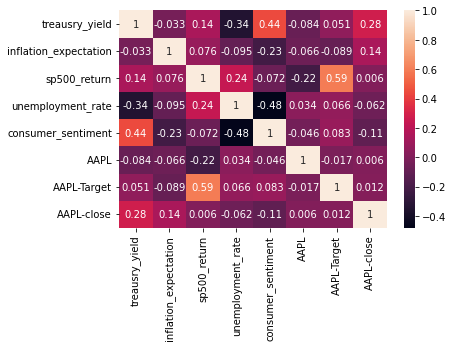

In [278]:
sns.heatmap(ticker_corr, annot=True)

## Data Preparation

In [279]:
FEATURES = list(ticker_df.iloc[:,:-1])
FEATURES

['treausry_yield',
 'inflation_expectation',
 'sp500_return',
 'unemployment_rate',
 'consumer_sentiment',
 'AAPL',
 'AAPL-Target']

## Machine Learning Application

In [280]:
result_dict = {}

In [281]:
#Takes inputs from Build a model - y_test, y_pred - and calculates the rations
## This function is called from the model function 

def summarize_classification(y_test,
                            y_pred
                            ):
    acc = accuracy_score (y_test, y_pred, normalize = True)
    num_acc = accuracy_score (y_test, y_pred, normalize = False)
    prec = precision_score (y_test, y_pred)
    recall = recall_score (y_test, y_pred)
    
    return {
        'accuracy':acc,
        'precision': prec,
        'recall':recall,
        'accuracy_count':num_acc}   

In [282]:
#Build a model that can work with several of the SKLearn functions
#1. Build Model -
## a.Inputs for the model will be the 
###a.1 classifier function (linerar regression, linear discriminant etc.,)
###b. name of y columns
###c. names of X columns
###d. dataset that includes x & y columns
###e. test fractions used to split the database into test and train sets - used in the train_test_split
## b.Identifies the X&Y columns in the dataset and the names of X columns and y columns specified  as input. 
## c.Peforms train test split on the dataset provided
## d.Peforms the instatntiation and training (fit) for the model that will be supplied later
## e.Peforms the prediction based on the test model 
## e.Peforms the prediction based on the test model 
## f.Calculate different ratios to identify the model efficiencies by calling the summarize_classification function defined earlier 
## g.Load the prediction results in a dataframe for analyzing the results.

def build_model(classifier_fn,
                name_of_y_col,
                names_of_x_cols,
                dataset,
                test_frac=0.2):
    X = dataset[names_of_x_cols]
    y = dataset[name_of_y_col]
    
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = test_frac)
    
    model = classifier_fn (x_train, y_train)
    
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    train_summary = summarize_classification (y_train, y_pred_train) 
    test_summary = summarize_classification (y_test, y_pred)
    
    pred_results = pd.DataFrame({'y_test':y_test,
                                'y_pred':y_pred})
    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
    
    return {
        'training': train_summary,
        'test': test_summary,
        'confusion_matrix': model_crosstab
    }

In [283]:
#Takes the results from the return and prints it out for comparision purposes
def compare_results():
    for key in result_dict:
        print('Classification:' , key)
        print()
        print('Training data')
        for score in result_dict[key]['training']:
            print(score, result_dict[key]['training'][score])
        print()
        print('Test data')
        for score in result_dict[key]['test']:
            print(score, result_dict[key]['test'][score])
        print()

In [284]:
# RandomForestClassifier
def random_forest_fn(x_train, y_train):
    model = RandomForestClassifier()
    model.fit(x_train, y_train)
    return model

In [285]:
result_dict['stock-price'] = build_model(random_forest_fn,
                                                   'AAPL-Target',
                                                   FEATURES,
                                                   ticker_df)
compare_results()

Classification: stock-price

Training data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 64

Test data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 17



In [286]:
# This function will be called  in the build model
def logistic_fn(x_train, y_train):
    model = LogisticRegression(solver = 'liblinear')
    model.fit(x_train, y_train)
    return model

In [287]:
"""Flow of the various functions
1. When we run compare results function it looks at results dict.
2. The result_dict calls 
calls the build model function and logistic function (provides as inputs to the build model function) 
2. This will 

"""
result_dict['stock-price'] = build_model(logistic_fn,
                                                 'AAPL-Target',
                                                  FEATURES,
                                                  ticker_df)
compare_results()

Classification: stock-price

Training data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 64

Test data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 17

